# Pymaceuticals Inc.
---
Written by Lauren Cadogan
---
### Analysis

In this project, I merged one dataset with information about mice and another about each mouse's treatment data.
The datasets were first merged into one dataframe. One mouse had duplicate data, so it was removed. There was 248
individual mice in this study.

A summary of tumor data was provided based on each drug regimen. Bar charts and pie charts were created to show the
number of mice tested on each drug and the number of male and female mice. We can conclude that sex
was not skewed in this study because male and female were nearly 50% split. 

The top 4 treatment were isolated for further analysis. Ceftamin and infubinol had the highest final tumor volumes,
and capomulin and ramicane has the lowest. I created a line chart of capomulin treatment on mouse s185 which shows
a negative correlation between tumor size and days on capomulin. We can conculde that capomulin was successful
at reducing the tumor size in this instance. 

Correlation and Regression was calculated using mouse weight and average tumor volume. There is a positive
correlation, meaning as the weight of the mouse increased, so did the average tumor volume. 

I did struggle with the boxplot and outliers. I used bootcampspot and the internet to get the code that I came up with but ultimately, ran out of time and did not produce an answer. 
 

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_studydf = pd.merge(mouse_metadata, study_results, on = 'Mouse ID')

# Display the data table for preview
mouse_studydf

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_studydf['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateRows = mouse_studydf[mouse_studydf.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_MID = pd.DataFrame(duplicateRows['Mouse ID'])


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_MID_data = mouse_studydf.set_index('Mouse ID')
duplicate_MID_data.loc['g989']


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_studydf.drop(mouse_studydf[(mouse_studydf['Mouse ID'] == 'g989')].index, inplace=True)

In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_studydf['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
summary_df = mouse_studydf.loc[:, ['Drug Regimen', 'Tumor Volume (mm3)']]
# Using the aggregation method, produce the same summary statistics in a single line.
summary_df = summary_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

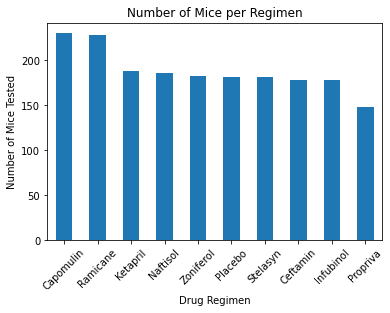

In [8]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

pandas_plot_data = pd.DataFrame(mouse_studydf['Drug Regimen'].value_counts())
pandas_plot = pandas_plot_data['Drug Regimen'].plot(kind = 'bar', rot = 45, title = 'Number of Mice per Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')


Text(0, 0.5, 'Number of Mice Tested')

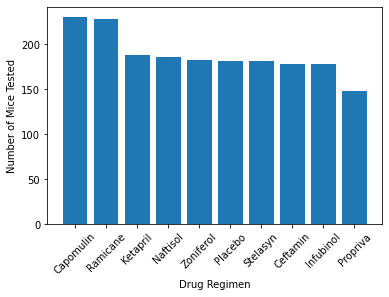

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

drug_reg_ct = pd.DataFrame(mouse_studydf['Drug Regimen'].value_counts())
x = drug_reg_ct.index
y = list(drug_reg_ct['Drug Regimen'])

plt.bar(x,y)
plt.xticks(rotation=45)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')


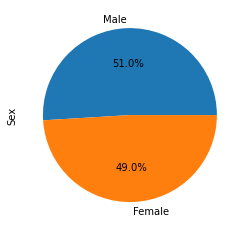

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_df = mouse_studydf['Sex'].value_counts()
sex_df.plot.pie(autopct='%1.1f%%')


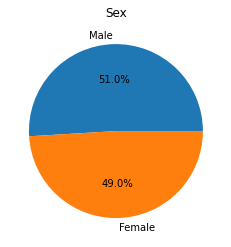

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male', 'Female']
plt.pie(mouse_studydf['Sex'].value_counts(), labels = labels, autopct='%.1f%%')
plt.title('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# - create a grouped DF that shows the last (greatest) time point for each mouse.
greatest_time_df = mouse_studydf.groupby('Mouse ID')['Timepoint'].max()

# - merge this grouped DF with the original cleaned DF
greatest_time_df = pd.merge(greatest_time_df, mouse_studydf, on = ['Mouse ID', 'Timepoint'], how = 'left')


#remove 'Placebo', 'Stelansyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'

greatest_time_df.drop(greatest_time_df[(greatest_time_df['Drug Regimen'] == 'Placebo')].index, inplace=True)
greatest_time_df.drop(greatest_time_df[(greatest_time_df['Drug Regimen'] == 'Stelasyn')].index, inplace=True)
greatest_time_df.drop(greatest_time_df[(greatest_time_df['Drug Regimen'] == 'Zoniferol')].index, inplace=True)
greatest_time_df.drop(greatest_time_df[(greatest_time_df['Drug Regimen'] == 'Ketapril')].index, inplace=True)
greatest_time_df.drop(greatest_time_df[(greatest_time_df['Drug Regimen'] == 'Propriva')].index, inplace=True)
greatest_time_df.drop(greatest_time_df[(greatest_time_df['Drug Regimen'] == 'Naftisol')].index, inplace=True)
greatest_time_df = greatest_time_df.reset_index()

drug_tumor_df = greatest_time_df.loc[:, ['Mouse ID', 'Timepoint', 'Drug Regimen', 'Tumor Volume (mm3)']]
drug_tumor_df


,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
0,a203,45,Infubinol,67.973419
1,a251,45,Infubinol,65.525743
2,a275,45,Ceftamin,62.999356
3,a411,45,Ramicane,38.407618
4,a444,45,Ramicane,43.047543
...,...,...,...,...
95,y769,45,Ceftamin,68.594745
96,y793,45,Capomulin,31.896238
97,y865,45,Ceftamin,64.729837
98,z578,45,Ramicane,30.638696


In [13]:
# - create a list the holds the treatment names
treatment_names = greatest_time_df['Drug Regimen'].unique()
treatment_names = treatment_names.tolist()
treatment_names

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = [[],[],[],[]]
  
# Locate the rows which contain mice on each drug and get the tumor volumes
Infubinol_tsize = drug_tumor_df[drug_tumor_df['Drug Regimen'] == 'Infubinol']
tumor_vol[0] = Infubinol_tsize['Tumor Volume (mm3)'].tolist()

Ceftamin_tsize = drug_tumor_df[drug_tumor_df['Drug Regimen'] == 'Ceftamin']
tumor_vol[1] = Ceftamin_tsize['Tumor Volume (mm3)'].tolist()

Ramicane_tsize = drug_tumor_df[drug_tumor_df['Drug Regimen'] == 'Ramicane']
tumor_vol[2] = Ramicane_tsize['Tumor Volume (mm3)'].tolist()

Capomulin_tsize = drug_tumor_df[drug_tumor_df['Drug Regimen'] == 'Capomulin']
tumor_vol[3] = Capomulin_tsize['Tumor Volume (mm3)'].tolist()
    
# add subset 
    
# Determine outliers using upper and lower bounds

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
'''
iqr_list = []
for vol in tumor_vol:
    q3, q1 = np.percentile(vol, [0.75, 0.25])
    iqr = q3 - q1
    iqr_list.append(iqr)
'''

#quartiles = df.quantile([.25, .75])
#lowerq = quartiles[0.25]
#upperq = quartiles[0.75]

#lower_bound = lowerq - (1.5 * iqr)
#upper_bound = upperq - (1.5 * iqr)

print(treatment_names)
tumor_vol


['Infubinol', 'Ceftamin', 'Ramicane', 'Capomulin']


[[67.97341878,
  65.52574285,
  57.03186187,
  66.08306589,
  72.2267309,
  36.321345799999996,
  60.96971133,
  62.43540402,
  60.91876652,
  67.28962147,
  66.19691151,
  62.11727887,
  47.01036401,
  60.16518046,
  55.62942846,
  45.69933088,
  54.65654872,
  55.65068132,
  46.25011212,
  54.04860769,
  51.54243058,
  50.00513807,
  58.26844248,
  67.68556862,
  62.75445141],
 [62.99935619,
  45.0,
  56.05774909,
  55.74282869,
  48.72207785,
  47.784681799999994,
  61.84902336,
  68.92318457,
  67.74866174,
  57.91838132,
  46.78453491,
  59.85195552,
  64.29983003,
  59.74190064,
  61.43389223,
  64.19234114,
  45.0,
  52.92534846,
  45.0,
  67.52748237,
  45.0,
  64.63494887,
  61.38666032,
  68.59474498,
  64.72983655],
 [38.407618299999996,
  43.04754260000001,
  38.81036633,
  32.97852192,
  38.34200823,
  33.39765251,
  37.31123552,
  40.65900627,
  29.12847181,
  33.56240217,
  36.37451039,
  31.56046955,
  36.13485243,
  22.05012627,
  30.56462509,
  31.09533505,
  45.22086

In [14]:
#Attempt number two on a for loop and figuring out quartiles

'''

tumor_vol2 = []

for name in treatment_names:
    drug_tumor = greatest_time_df.loc[greatest_time_df['Drug Regimen'] == name, 'Tumor Volume (mm3)']
    tumor_vol2.append(drug_tumor)

quartiles = tumor_vol2.quantile([.25, .5, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq
lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq - (1.5 * iqr)

'''

"\n\ntumor_vol2 = []\n\nfor name in treatment_names:\n    drug_tumor = greatest_time_df.loc[greatest_time_df['Drug Regimen'] == name, 'Tumor Volume (mm3)']\n    tumor_vol2.append(drug_tumor)\n\nquartiles = tumor_vol2.quantile([.25, .5, .75])\nlowerq = quartiles[0.25]\nupperq = quartiles[0.75]\niqr = upperq - lowerq\nlower_bound = lowerq - (1.5 * iqr)\nupper_bound = upperq - (1.5 * iqr)\n\n"

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
med_tum_df = pd.DataFrame(treatment_names, tumor_vol)
boxplot = med_tum_df.boxplot()

boxplot

#, ax1 = plt.subplots()
#ax1.set_title('Treatment to Tumor Volume')
#ax1.set_ylabel('Final Tumor Volume (mm3)')
#ax1.boxplot(temperatures)
#plt.show()


ValueError: Shape of passed values is (4, 1), indices imply (25, 1)

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin treatment of mouse s185')

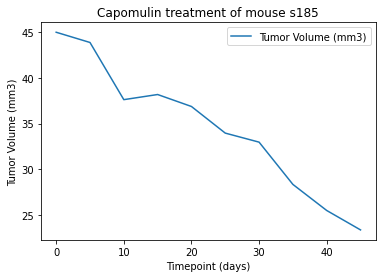

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#df of capomulin only
Capomulin_df = mouse_studydf.loc[mouse_studydf['Drug Regimen'] == 'Capomulin']
#one mouse on capomulin
mouse_s185 = pd.DataFrame(Capomulin_df.loc[Capomulin_df['Mouse ID'] == 's185'])
#line chart

mouse_s185.plot.line(y = 'Tumor Volume (mm3)', x = 'Timepoint')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse s185')



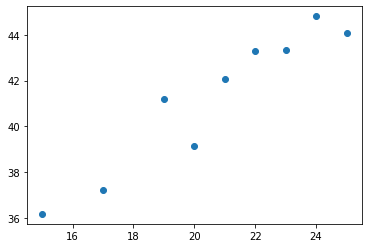

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

ave_tumor_vol = pd.DataFrame(Capomulin_df.groupby('Weight (g)')['Tumor Volume (mm3)'].mean())

x_values = ave_tumor_vol.index
y_values = ave_tumor_vol['Tumor Volume (mm3)']

plt.scatter(x_values, y_values)

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.9034966277438606


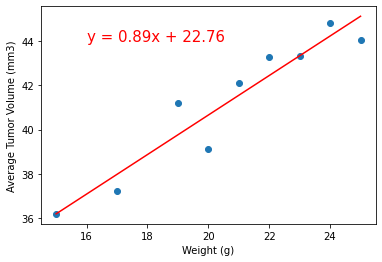

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(16,44),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The correlation between mouse weight and the average tumor volume is {rvalue**2}")
plt.show()

